# Loading data from External sources

You create a connection by using the connect() method. we can rename to any name by using as... In brackets is the name of the DB. The example was doneon Visual Studio

## SQL

In [2]:
import sqlite3 as sqlite
cnx = sqlite.connect( #cnx is hte variable where we save the connection
 database='crs1273' #this is the name of the DB
)

In [ ]:
cursor=cnx.curser() # this is an object curser used for writing in the DB. The name of the variable can be anything.

Now we can use SQL:
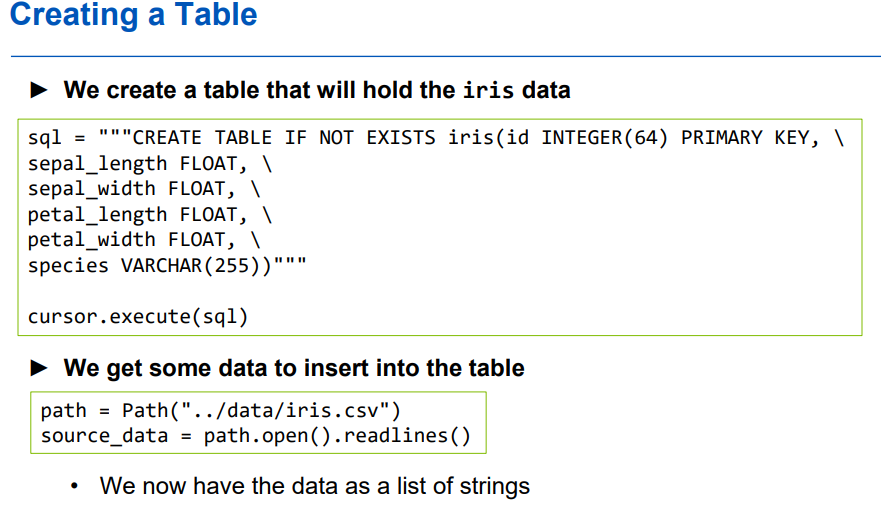

note that the SQL is wrapped into the tripple quatation """ because it is a string.

cursor.execute(sql) is how we launch the execution on teh DB level.


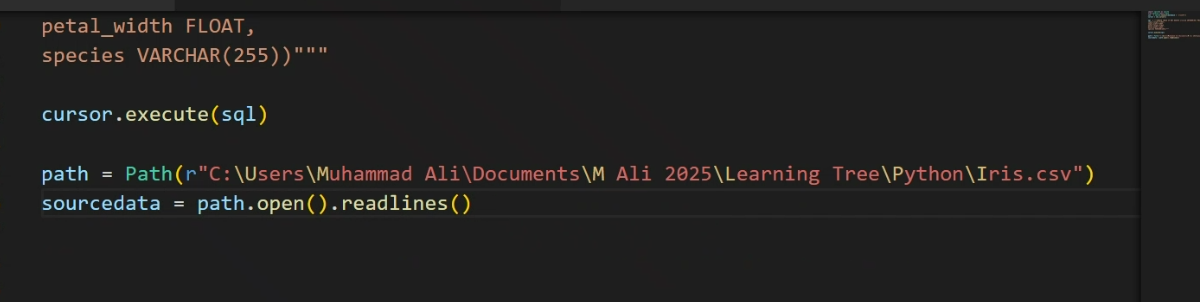

In [ ]:
import sqlite3 as sqlite
from pathlib import Path
cnx = sqlite.connect(
 database='crs1273'
) #we need usually a user name and passwork as well as host and port.

cursor = cnx.cursor()

sql = """CREATE TABLE IF NOT EXISTS iris(id INTEGER(64) PRIMARY KEY, 
sepal_length FLOAT, 
sepal_width FLOAT, 
petal_length FLOAT, 
petal_width FLOAT, 
species VARCHAR(255))"""
cursor.execute(sql)

path = Path(r"C:\..\data\iris.csv")
source_data = path.open().readlines()
source_data= source_data[1:] #we start from the second row because the first row is teh heather.

for record in source_data:
 entries = record.strip().split(",")
 sql = f"""INSERT INTO iris \
 (id, sepal_length, sepal_width, petal_length, petal_width, species) \
 VALUES ({entries[0]}, {entries[1]}, {entries[2]}, \
 {entries[3]}, {entries[4]}, '{entries[5]}');"""
 cursor.execute(sql)

#This is how we read from the DB:
cursor.execute("SELECT * FROM iris")
for row in cursor.fetchall():
 print(row)

In [ ]:
import sqlite3 as sqlite
from pathlib import Path
cnx   = sqlite.connect(database = 'crs1273')
cursor = cnx.cursor()
 
sql  = """CREATE TABLE IF NOT EXISTS iris(id INTEGER(64) PRIMARY KEY,
sepal_length FLOAT,
sepal_width FLOAT,
petal_length FLOAT,
petal_width FLOAT,
species VARCHAR(255))"""
 
cursor.execute(sql)
 
path = Path(r"C:\Users\Muhammad Ali\Documents\M Ali 2025\Learning Tree\Python\Iris.csv")
source_data = path.open().readlines()
source_data = source_data[1:]
 
for record in source_data:
    entries = record.strip().split(',')
   
    sql = f"""INSERT INTO iris \
    (id, sepal_length, sepal_width, petal_length, petal_width, species) \
    VALUES ({entries[0]}, {entries[1]}, {entries[2]}, \
    {entries[3]}, {entries[4]}, '{entries[5]}');"""
    cursor.execute(sql)
 

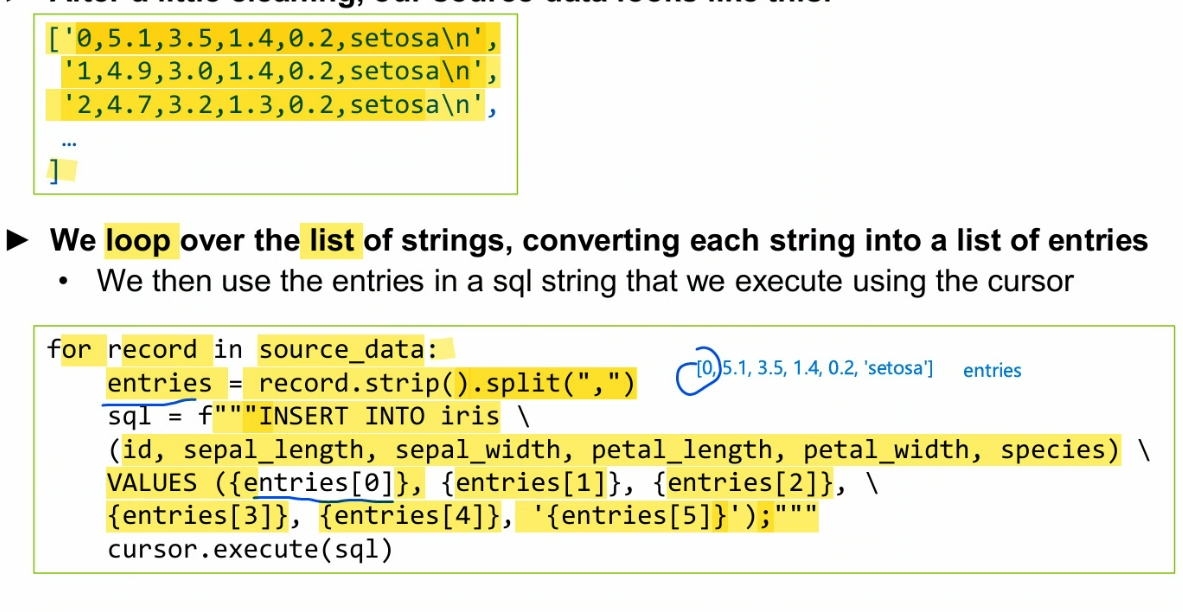

We make a loop. 

We strip all unnecessary characters like \n
We use split() for the , seperator
So the variable entries is actually what will contain the clean record to be inserted.
Then on the level of sql variable we give the columns and the individual values to be impoerted. The individual records are taken from the list entries. We refer to each element in the list {entries[0]}. the curly brackes are because of Python syntax. This is from the f"....{}...." - the {var} is the placeholder of the variable. NOTE: the last element tat is inserted is in ' ' because it is a string.





## NoSQL

There is no concepts of colums and rows in NoSQL. They have the concept of layout of page.

In [ ]:
 client = pymongo.MongoClient(
  "mongodb://localhost:27017",
  username='student',
  password='studentpw’
  ) #This is to the whole MondoDB conneciton
#then we need to point to a client:

db = client['crs1273']

#then we do not have a clissical DB, we have a collection:

collection = db['iris']


columns = ['_id’, sepal_length, sepal_width,
 petal_length, petal_width, species]
for record in source_data:
 entries = record.strip().split(",")
 entries[0] = int(entries[0]) #here we make a conversion to INT
 for i in range(5): #range goes 0-4 - 5 is exclusive
 entries[i] = float(entries[i]) #here we cast to float
 document = dict(zip(columns,entries)) #dict(zip()) means we construct a dictionary pairing key and value (columns and entries)
 collection.insert_one(document) #the document has the notion of the distionary of the two elements column and entry.

#This is how we look into the MongoDB:
cursor = collection.find()
for document in cursor:
 print(document)

# External APIs sources

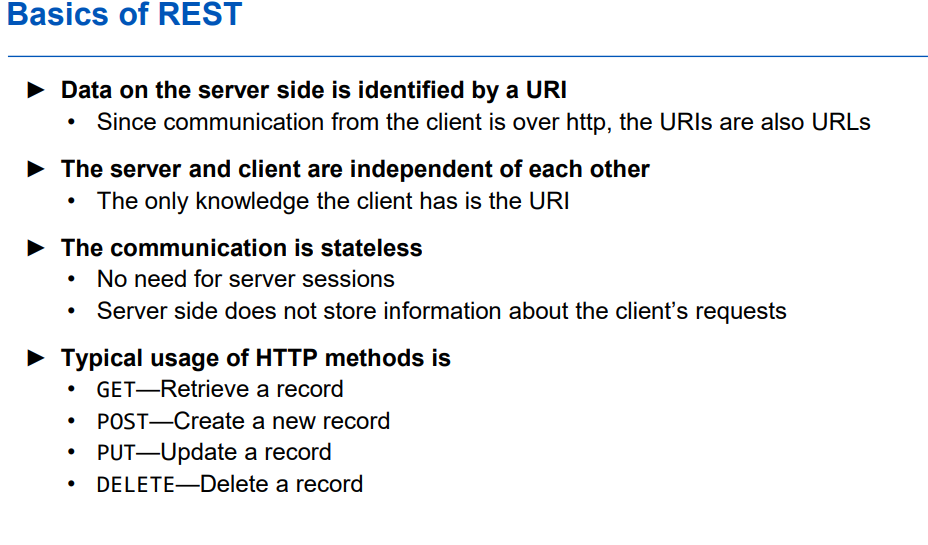

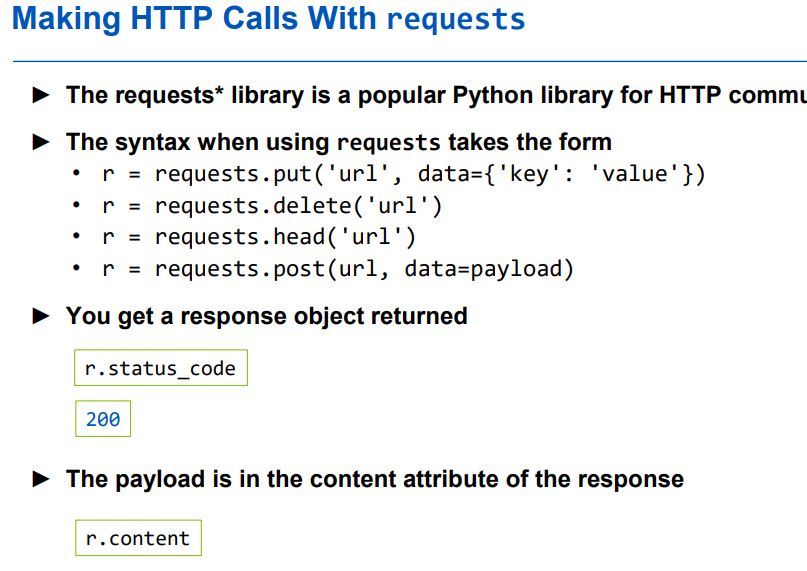

url is not the tipical URL but the access streight to the data. the data is returned in the r.content. r.status 200 means the connection is OK.

In general check if the acccessed sites are Ok with accessing the data.

'https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/od/rates_of_exchange?filter=record_date:gte:2024-01-01&page[size]=200'

the ? means we are quering
gte - grater then or equal

the response will come in a form of a dictionary. Then we can use JSON to make it better readability.




In [ ]:
import requests

# response='https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/od/rates_of_exchange?filter=record_date:gte:2024-01-01&page[size]=200'

#examplewtih Bank of England

url_endpoint = 'http://www.bankofengland.co.uk/boeapps/iadb/fromshowcolumns.asp?csv.x=yes'

#we can use below for filter
payload = {
    'Datefrom'   : '01/Jan/2020',
    'Dateto'     : '01/Oct/2020',
    'SeriesCodes': 'IUMBV34,IUMBV37,IUMBV42,IUMBV45',
    'CSVF'       : 'TN',
    'UsingCodes' : 'Y',
    'VPD'        : 'Y',
    'VFD'        : 'N'
}


headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/54.0.2840.90 '
                  'Safari/537.36'
}


response = requests.get(url_endpoint, params=payload, headers=headers)


# Check if the response was successful, it should return '200'
print(response.status_code)

data = response.content
print(data)



for WIKIPEDIA there is no end point. Hence we will use BeautifulSoup. it will fetch the data and use the html parser of the package.
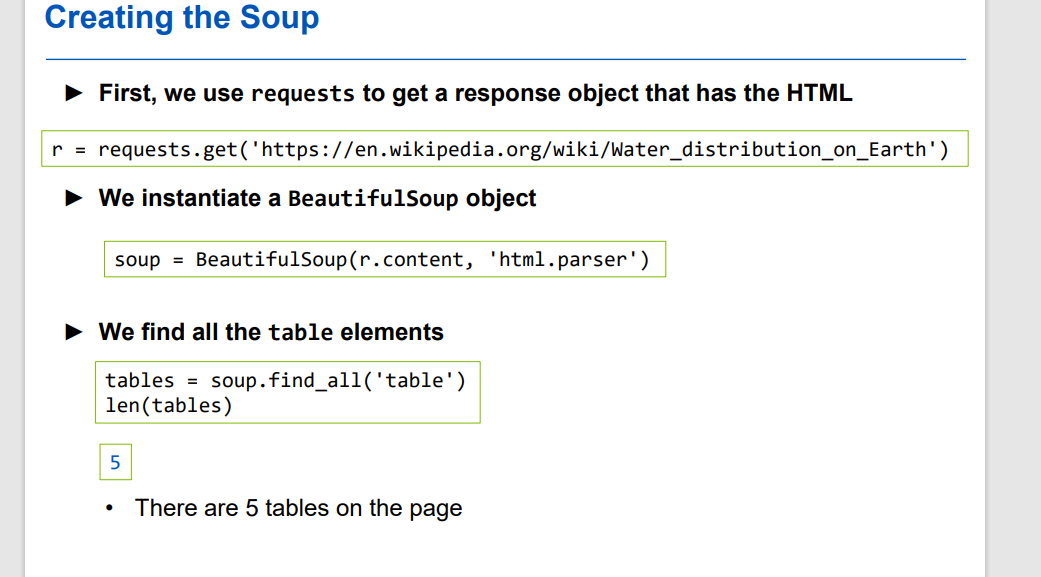

teh usage of table tag comes into use. we will trace how many tables are available.

Example for WIKI call:

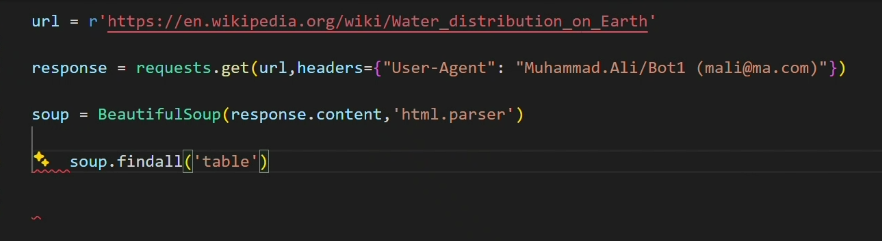

<th> - table header
<td> - table data
tr - table record    

In [ ]:
#Wiki example:
import requests
from bs4 import BeautifulSoup
 
url = r'https://en.wikipedia.org/wiki/Water_distribution_on_Earth'
 
response = requests.get(url,headers={"User-Agent": "Muhammad.Ali/Bot1 (mali@ma.com)"})
 
soup = BeautifulSoup(response.content,'html.parser')
 
tables = soup.find_all('table')
 
rows = tables[0].tbody.find_all('tr')
# headers
entries = rows.pop(0).find_all('th')
headers = [entry.text for entry in entries]
print(headers)
 
for row in rows:
    entries = row.find_all('td')
    record = [entry.text for entry in entries]
    print(record)

In [ ]:
#Bank of england example:
import requests
 
url_endpoint = 'http://www.bankofengland.co.uk/boeapps/iadb/fromshowcolumns.asp?csv.x=yes'
 
payload = {
    'Datefrom'   : '01/Jan/2020',
    'Dateto'     : '01/Oct/2025',
    'SeriesCodes': 'IUMBV34,IUMBV37,IUMBV42,IUMBV45',
    'CSVF'       : 'TN',
    'UsingCodes' : 'Y',
    'VPD'        : 'Y',
    'VFD'        : 'N'
}
 
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/54.0.2840.90 '
                  'Safari/537.36'
}
 
response = requests.get(url_endpoint,headers=headers,params=payload)
 
data = response.content
 
print(data)